## Import Libraries

In [27]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pathlib
import os
import pandas as pd
from collections import Counter
import importlib.util


## Import Data Files

In [28]:
source_file_path = os.path.join(os.path.dirname(os.getcwd()),'parent','constants','__init__.py')


spec = importlib.util.spec_from_file_location('__init__', source_file_path)
source_file = importlib.util.module_from_spec(spec)
spec.loader.exec_module(source_file)


path=[]
for dirname, _, filenames in os.walk(os.path.join(os.path.dirname(os.getcwd()),source_file.DATASET_DIR)): 
    for filename in filenames:
        if(pathlib.Path(os.path.join(dirname, filename)).suffix =='.csv'):
           path.append(os.path.join(dirname, filename))

##### Read the imported files

In [29]:
for filename in path:
    if(os.path.basename(filename)=='Churn_Modelling.csv'): 
        train_set=pd.read_csv(filename) 
   

## Exploratory Data Analysis(EDA)

##### At first get a brief idea of data i.e features

In [30]:
train_set.head(2)#gives first 2 rows of dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


##### Gather insights of the data now i.e null values

In [31]:
train_set.info()  #gives datatype,count of entries i.e for checking null values in features 
print("\n","="*80,"\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB




##### Find actual % of null values of all features now

In [32]:
#gives % of null values corresponding to all features
print(100*train_set.isnull().sum()/len(train_set))
print("\n","="*80,"\n")


RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64




##### Get a better insight of data i.e mean,s.d,percentiles etc.

In [33]:
#gives a vivid insight of data i.e mean,count,max,min,std.50% etc
print(train_set.describe())
print("\n","="*80,"\n")


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

##### Make a copy of actual data

In [34]:
train_set_mod= train_set.copy()


## Data Visualisation

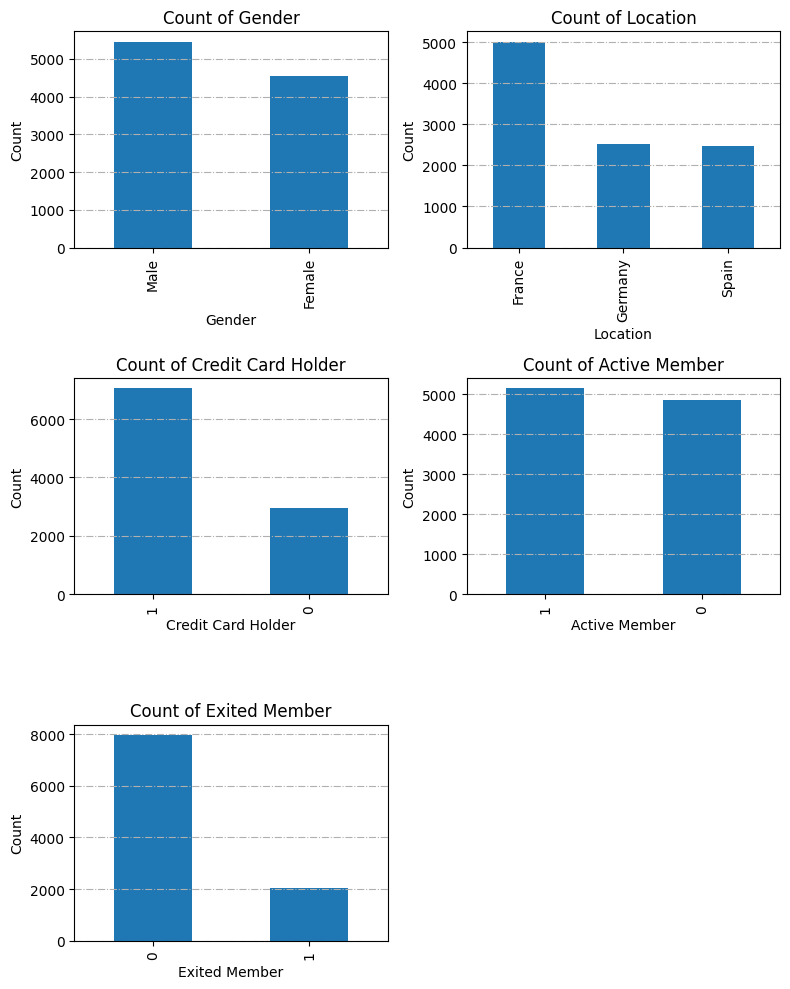

In [35]:


# Separate counts
gender_counts = train_set_mod["Gender"].value_counts()
location_counts = train_set_mod["Geography"].value_counts()
credit_card_counts = train_set_mod["HasCrCard"].value_counts()
active_member_counts = train_set_mod["IsActiveMember"].value_counts()
exited_member_counts = train_set_mod["Exited"].value_counts()

#  figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(8, 10))


gender_counts.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Count of Gender")
axes[0, 0].grid(axis="y", linestyle="-.")

location_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_xlabel("Location")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_title("Count of Location")
axes[0, 1].grid(axis="y", linestyle="-.")


credit_card_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel("Credit Card Holder")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Count of Credit Card Holder")
axes[1, 0].grid(axis="y", linestyle="-.")


active_member_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel("Active Member")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_title("Count of Active Member")
axes[1, 1].grid(axis="y", linestyle="-.")


exited_member_counts.plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_xlabel("Exited Member")
axes[2, 0].set_ylabel("Count")
axes[2, 0].set_title("Count of Exited Member")
axes[2, 0].grid(axis="y", linestyle="-.")

# Hide empty subplot 
axes[2, 1].axis('off')

#  spacing between subplots
plt.tight_layout()


plt.show()

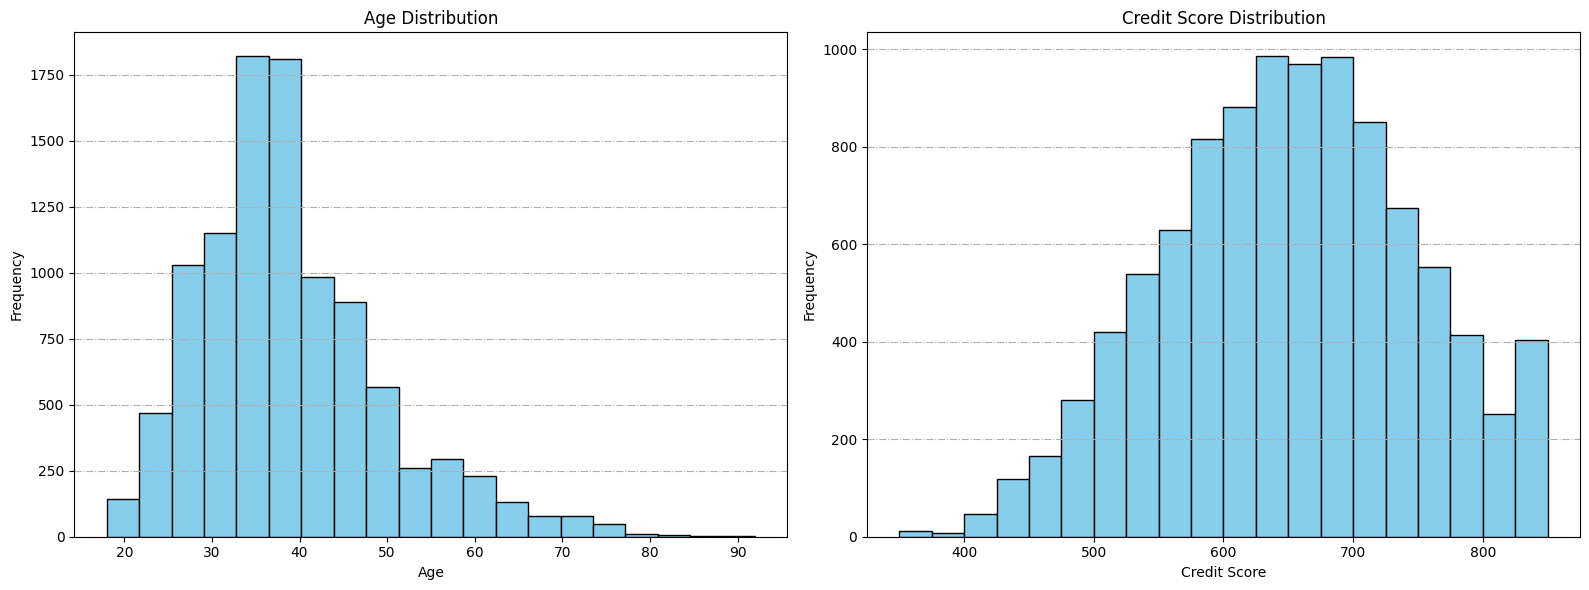

In [45]:

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  


axes[0].hist(train_set_mod['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Age Distribution")
axes[0].grid(axis="y", linestyle="-.")


axes[1].hist(train_set_mod['CreditScore'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_xlabel("Credit Score")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Credit Score Distribution")
axes[1].grid(axis="y", linestyle="-.")

plt.tight_layout()  
plt.show()

In [ ]:

genre_text = ' '.join(train_set_mod['GENRE'])
movie_name_text = ' '.join(train_set_mod['TITLE'])


genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
movie_name_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_name_text)

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.title('Genre Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(movie_name_wordcloud, interpolation='bilinear')
plt.title('Movie Name Word Cloud')
plt.axis('off')

plt.show()

In [ ]:
# Now building a corpus which will be a 2d list with 27 rows one row for each genre's description corpus
corpus = []
for i in range(len(train_set_mod['GENRE'].unique())):
    corpus_i = []
    for desc in train_set_mod[train_set_mod['Labeled Genre'] == i]['Processed Description'].tolist():
        for word in desc.split():
            corpus_i.append(word)
    corpus.append(corpus_i)



In [ ]:
fig, axs = plt.subplots(nrows=9, ncols=3,figsize=(16,30))
plt.subplots_adjust(hspace=0.75)
fig.suptitle('Bar Graphs showing the Most Common words')

for i, l in enumerate(corpus):
    colors = np.random.rand(20, 3)
    ax = axs[i//3,i%3]
    df = pd.DataFrame(Counter(l).most_common(20))
    ax.bar(df[0], df[1], color=colors)
    ax.set_title(le.inverse_transform([i])[0])

    # Setting tick positions and labels
    ax.set_xticks(np.arange(len(df[0])))
    ax.set_xticklabels(df[0].tolist(),rotation=90)

plt.xticks(rotation='vertical')
plt.show()